In [2]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("nagpalprabhavalkar/tech-use-and-stress-wellness")
print("Path to dataset files:", path)

c:\Users\patbe\Machine Leaning Project\ml_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\patbe\.cache\kagglehub\datasets\nagpalprabhavalkar\tech-use-and-stress-wellness\versions\1


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import xgboost as xgb

# Use the path from the previous cell to construct the full file path
file_path = f"{path}/Tech_Use_Stress_Wellness.csv"

# Load dataset
df = pd.read_csv(file_path)

# Separate features and target
X = df.drop("stress_level", axis=1)
y = df["stress_level"]

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['gender', 'location_type'], drop_first=True)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost Regressor (ordinal regression via regression)
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=300, learning_rate=0.05, max_depth=6)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Round predictions to nearest integer (1–10 range)
y_pred_rounded = np.clip(np.round(y_pred), 1, 10)

# Regression metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)

# Classification-style metric (after rounding)
accuracy = accuracy_score(y_test, y_pred_rounded)

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")
print(f"Accuracy (after rounding): {accuracy:.3f}")

MAE: 0.225
RMSE: 0.347
R²: 0.986
Accuracy (after rounding): 0.857


In [4]:
df

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,1,53,Male,6.8,2.9,2.1,0.5,2.0,2.3,3.0,...,3,4.4,Rural,79.0,True,True,150.4,7.0,3.0,14.0
1,2,66,Female,4.1,2.1,1.6,0.4,0.8,2.8,3.5,...,4,4.1,Rural,71.0,True,True,124.1,7.0,10.0,15.5
2,3,43,Male,4.7,3.6,0.0,0.5,1.4,3.7,3.6,...,6,1.4,Urban,67.0,True,True,218.3,11.0,7.0,19.5
3,4,29,Female,6.0,4.5,0.0,0.2,1.3,4.5,4.0,...,10,0.0,Rural,55.0,True,True,133.7,17.0,14.0,13.9
4,5,57,Male,6.7,3.4,2.0,0.8,1.2,3.8,3.5,...,6,2.8,Urban,62.0,False,False,192.8,5.0,8.0,26.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,17,Female,7.0,2.2,0.9,0.5,2.3,4.5,4.1,...,10,0.0,Rural,55.0,False,False,233.0,18.0,16.0,11.8
4996,4997,42,Female,1.9,1.5,1.5,0.2,0.0,1.7,2.7,...,2,5.3,Rural,79.0,False,True,159.3,2.0,1.0,13.0
4997,4998,20,Female,6.3,1.5,2.6,0.6,0.8,4.5,3.9,...,10,0.1,Rural,47.0,False,False,83.0,12.0,17.0,9.1
4998,4999,58,Male,6.2,3.5,1.2,1.3,1.3,3.8,3.7,...,5,4.3,Urban,76.0,False,False,108.0,6.0,7.0,16.0


This code performs the following steps:

1.  **Import Libraries:** Imports necessary libraries: `pandas` for data manipulation, `numpy` for numerical operations, `train_test_split` from `sklearn.model_selection` for splitting data, metrics (`mean_absolute_error`, `mean_squared_error`, `r2_score`, `accuracy_score`) from `sklearn.metrics` for evaluating the model, and `xgboost` for the machine learning model.

2.  **Load Data:** Constructs the full file path to the dataset using the `path` variable (obtained from a previous cell) and loads the `Tech_Use_Stress_Wellness.csv` file into a pandas DataFrame called `df`.

3.  **Separate Features and Target:**
    *   `X` is created by dropping the "stress_level" column from the DataFrame `df`, representing the features (input variables).
    *   `y` is created by selecting the "stress_level" column from the DataFrame `df`, representing the target variable (what we want to predict).

4.  **One-Hot Encode Categorical Features:** Converts the categorical columns 'gender' and 'location_type' into a numerical format using one-hot encoding. This creates new binary columns for each unique category within these columns, which is necessary for the XGBoost model. `drop_first=True` avoids multicollinearity.

5.  **Train-Test Split:** Splits the data into training and testing sets using `train_test_split`. 80% of the data is used for training the model (`X_train`, `y_train`), and 20% is used for evaluating the model (`X_test`, `y_test`). `random_state=42` ensures reproducibility of the split.

6.  **Define and Train XGBoost Model:**
    *   An `xgb.XGBRegressor` model is defined. Since the stress level is an ordinal value (1-10), this approach treats it as a regression problem.
    *   `objective="reg:squarederror"` specifies the regression objective.
    *   `n_estimators`, `learning_rate`, and `max_depth` are hyperparameters controlling the model's complexity and learning process.
    *   The model is trained on the training data (`X_train`, `y_train`).

7.  **Make Predictions:** The trained model is used to make predictions on the test set (`X_test`), and the predictions are stored in `y_pred`.

8.  **Round Predictions:** The regression predictions (`y_pred`) are rounded to the nearest integer and clipped to be within the valid range of 1 to 10, as stress levels are expected to be in this range. The rounded predictions are stored in `y_pred_rounded`.

9.  **Evaluate Model:** Calculates several metrics to evaluate the model's performance:
    *   **MAE (Mean Absolute Error):** Measures the average absolute difference between the actual and predicted values.
    *   **RMSE (Root Mean Squared Error):** Measures the square root of the average squared difference between the actual and predicted values, giving more weight to larger errors.
    *   **R² (R-squared):** Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
    *   **Accuracy:** Calculated after rounding the predictions, this measures the percentage of predictions that exactly match the actual stress levels.

10. **Print Metrics:** Prints the calculated MAE, RMSE, R², and Accuracy scores, formatted to three decimal places.

In [3]:
print(df.columns)

Index(['user_id', 'age', 'gender', 'daily_screen_time_hours',
       'phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours',
       'tv_usage_hours', 'social_media_hours', 'work_related_hours',
       'entertainment_hours', 'gaming_hours', 'sleep_duration_hours',
       'sleep_quality', 'mood_rating', 'stress_level',
       'physical_activity_hours_per_week', 'location_type',
       'mental_health_score', 'uses_wellness_apps', 'eats_healthy',
       'caffeine_intake_mg_per_day', 'weekly_anxiety_score',
       'weekly_depression_score', 'mindfulness_minutes_per_day'],
      dtype='object')


In [4]:
import os

# List files in the downloaded directory
print(os.listdir(path))

['Tech_Use_Stress_Wellness.csv']


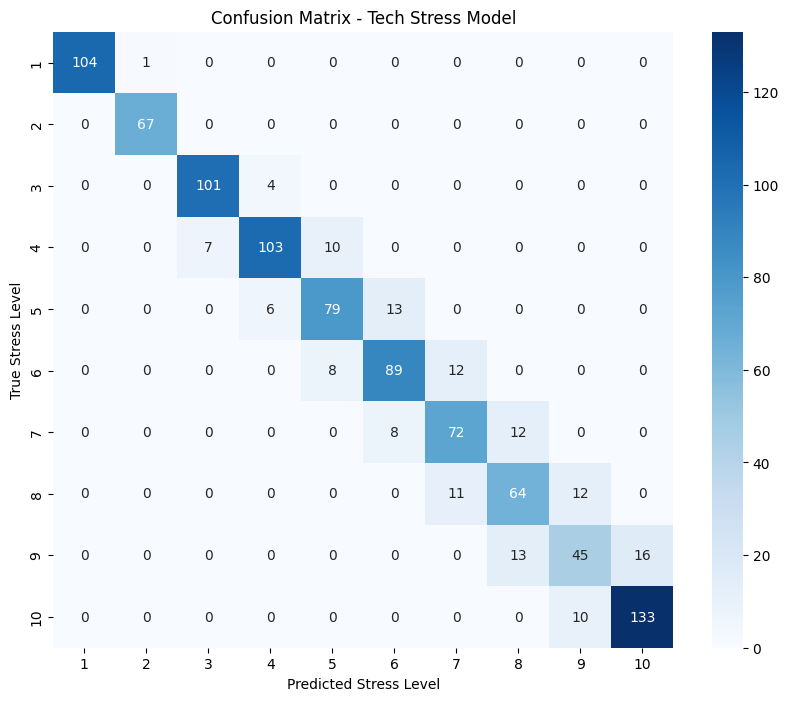

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Tech Stress Model
cm_stress = confusion_matrix(y_test, y_pred_rounded, labels=range(1,11))

plt.figure(figsize=(10,8))
sns.heatmap(cm_stress, annot=True, fmt="d", cmap="Blues", xticklabels=range(1,11), yticklabels=range(1,11))
plt.xlabel("Predicted Stress Level")
plt.ylabel("True Stress Level")
plt.title("Confusion Matrix - Tech Stress Model")
plt.show()


C:\Users\patbe\AppData\Local\Temp\ipykernel_6352\3494774457.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp_df.head(15), palette="viridis")


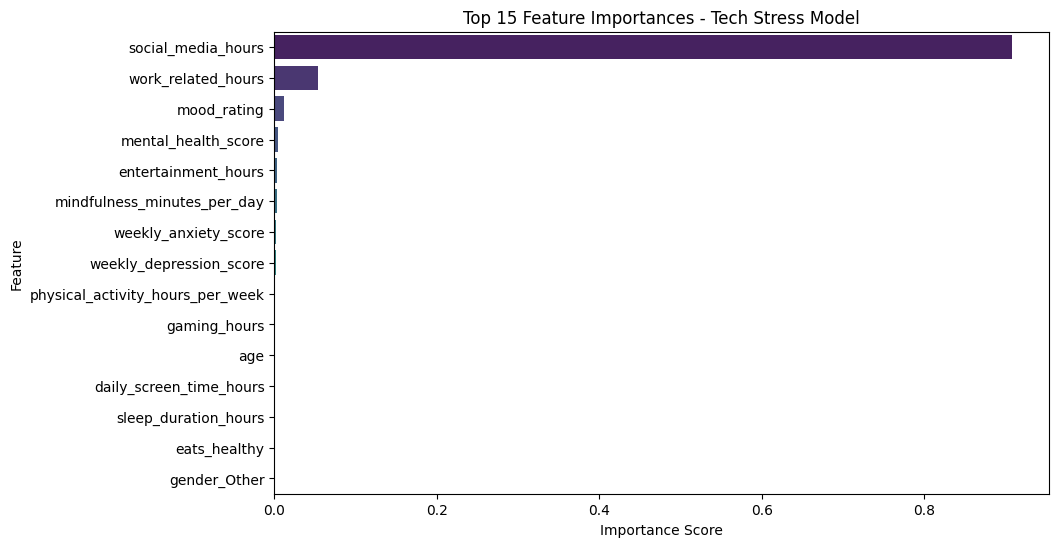

In [7]:
# Feature importance for Stress Model
importances = model.feature_importances_
feature_names = X_train.columns

# Create DataFrame for sorting
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df.head(15), palette="viridis")
plt.title("Top 15 Feature Importances - Tech Stress Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# Now Inputting to Alzheimers Dataset/ Creating synthetic variable

#Similar Columns in Alz and Tech Datasets

Physical Activity

Diet Quality

Sleep Quality

Depression

In [49]:
tech_similar_cols = ['physical_activity_hours_per_week', 'eats_healthy', 'sleep_quality', 'weekly_depression_score', 'stress_level']

tech_similar_df = df[tech_similar_cols].copy()
tech_similar_df['eats_healthy'] = tech_similar_df['eats_healthy'].astype(int)
tech_similar_df

,physical_activity_hours_per_week,eats_healthy,sleep_quality,weekly_depression_score,stress_level
0,4.4,1,4.0,3.0,3
1,4.1,1,4.0,10.0,4
2,1.4,1,4.0,7.0,6
3,0.0,1,4.0,14.0,10
4,2.8,0,4.0,8.0,6
...,...,...,...,...,...
4995,0.0,0,4.0,16.0,10
4996,5.3,1,4.0,1.0,2
4997,0.1,0,4.0,17.0,10
4998,4.3,0,3.0,7.0,5


In [50]:
#scale columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

tech_similar_scaled = scaler.fit_transform(tech_similar_df)

tech_similar_df_scaled = pd.DataFrame(
    tech_similar_scaled,
    columns=tech_similar_df.columns,
    index=tech_similar_df.index
)


print("Original data:")
print(tech_similar_df.head())
print("\nOriginal data statistics:")
print(tech_similar_df.describe())

print("\nScaled data:")
print(tech_similar_df_scaled.head())
print("\nScaled data statistics:")
print(tech_similar_df_scaled.describe())

# Verify scaling worked (should have mean ~0 and std ~1)
print("\nScaled data means (should be close to 0):")
print(tech_similar_df_scaled.mean())
print("\nScaled data standard deviations (should be close to 1):")
print(tech_similar_df_scaled.std())
tech_similar_df_scaled

Original data:
   physical_activity_hours_per_week  eats_healthy  sleep_quality  \
0                               4.4             1            4.0   
1                               4.1             1            4.0   
2                               1.4             1            4.0   
3                               0.0             1            4.0   
4                               2.8             0            4.0   

   weekly_depression_score  stress_level  
0                      3.0             3  
1                     10.0             4  
2                      7.0             6  
3                     14.0            10  
4                      8.0             6  

Original data statistics:
       physical_activity_hours_per_week  eats_healthy  sleep_quality  \
count                        5000.00000   5000.000000    5000.000000   
mean                            2.65934      0.502800       4.009400   
std                             2.28885      0.500042       0.663777   
min

,physical_activity_hours_per_week,eats_healthy,sleep_quality,weekly_depression_score,stress_level
0,0.760571,0.994416,-0.014163,-0.967483,-0.932628
1,0.629488,0.994416,-0.014163,0.530831,-0.589548
2,-0.550261,0.994416,-0.014163,-0.111303,0.096611
3,-1.161983,0.994416,-0.014163,1.387011,1.468931
4,0.061461,-1.005616,-0.014163,0.102742,0.096611
...,...,...,...,...,...
4995,-1.161983,-1.005616,-0.014163,1.815101,1.468931
4996,1.153821,0.994416,-0.014163,-1.395573,-1.275708
4997,-1.118289,-1.005616,-0.014163,2.029146,1.468931
4998,0.716877,-1.005616,-1.520844,-0.111303,-0.246469


In [51]:
#model to predict stress level. Probably not going to perform well lol

X_sim = tech_similar_df_scaled.drop('stress_level', axis=1)
y_sim = tech_similar_df_scaled['stress_level']

print("Features for stress prediction:")
print(X_sim.columns.tolist())
print(f"Features shape: {X_sim.shape}")
print(f"Target shape: {y_sim.shape}")


#Train test split
X_sim_train, X_sim_test, y_sim_train, y_sim_test = train_test_split(
    X_sim, y_sim, test_size=0.2, random_state=42
)


#train xgb model
stress_predict_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

stress_predict_model.fit(X_sim_train, y_sim_train)



#predictions
y_sim_pred = stress_predict_model.predict(X_sim_test)


# Convert predictions back to original 1-10 scale for evaluation
# Get the scaler parameters for stress_level
stress_mean = tech_similar_df['stress_level'].mean()
stress_std = tech_similar_df['stress_level'].std()

# Inverse transform predictions and actual values
y_sim_pred_original = y_sim_pred * stress_std + stress_mean
y_sim_test_original = y_sim_test * stress_std + stress_mean

# Round to 1-10 scale
y_sim_pred_rounded = np.clip(np.round(y_sim_pred_original), 1, 10)
y_sim_test_rounded = np.clip(np.round(y_sim_test_original), 1, 10)

# Evaluate using original scale
mae_sim = mean_absolute_error(y_sim_test_original, y_sim_pred_original)
rmse_sim = np.sqrt(mean_squared_error(y_sim_test_original, y_sim_pred_original))
r2_sim = r2_score(y_sim_test_original, y_sim_pred_original)
accuracy_sim = accuracy_score(y_sim_test_rounded, y_sim_pred_rounded)

print("\n=== Stress Prediction Model (4 scaled columns) ===")
print(f"MAE: {mae_sim:.3f}")
print(f"RMSE: {rmse_sim:.3f}")
print(f"R²: {r2_sim:.3f}")
print(f"Accuracy (after rounding): {accuracy_sim:.3f}")

# Save scaler parameters for later use with Alzheimer's data
print(f"\nScaler parameters to save:")
print(f"Stress mean: {stress_mean:.3f}")
print(f"Stress std: {stress_std:.3f}")

Features for stress prediction:
['physical_activity_hours_per_week', 'eats_healthy', 'sleep_quality', 'weekly_depression_score']
Features shape: (5000, 4)
Target shape: (5000,)

=== Stress Prediction Model (4 scaled columns) ===
MAE: 1.023
RMSE: 1.290
R²: 0.804
Accuracy (after rounding): 0.304

Scaler parameters to save:
Stress mean: 5.718
Stress std: 2.915


C:\Users\patbe\AppData\Local\Temp\ipykernel_23648\699583604.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp_sim_df, palette="viridis")


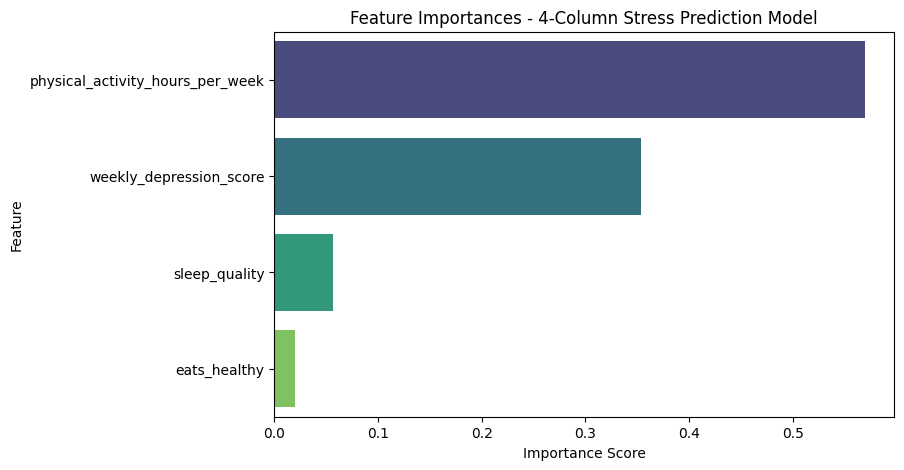


Feature Importance Rankings:
                            Feature  Importance
0  physical_activity_hours_per_week    0.569500
3           weekly_depression_score    0.353535
2                     sleep_quality    0.056694
1                      eats_healthy    0.020271


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Importance
importances_sim = stress_predict_model.feature_importances_
feature_names_sim = X_sim_train.columns

feat_imp_sim_df = pd.DataFrame({
    "Feature": feature_names_sim,
    "Importance": importances_sim
}).sort_values(by="Importance", ascending=False)


plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp_sim_df, palette="viridis")
plt.title("Feature Importances - 4-Column Stress Prediction Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("\nFeature Importance Rankings:")
print(feat_imp_sim_df)

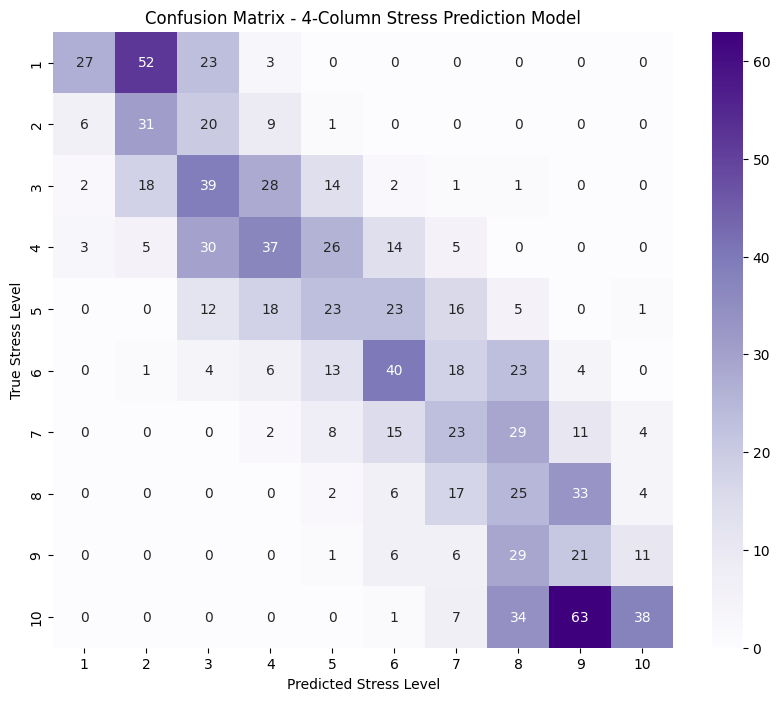

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

cm_stress_sim = confusion_matrix(y_sim_test_rounded, y_sim_pred_rounded, labels=range(1,11))

plt.figure(figsize=(10,8))
sns.heatmap(cm_stress_sim, annot=True, fmt="d", cmap="Purples", 
            xticklabels=range(1,11), yticklabels=range(1,11))
plt.xlabel("Predicted Stress Level")
plt.ylabel("True Stress Level")
plt.title("Confusion Matrix - 4-Column Stress Prediction Model")
plt.show()

In [55]:
#Attempting to apply model to Alzheimers

alz_df = pd.read_csv('alzheimers_disease_data (1).csv')
alz_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [57]:
# Extracting similar columns
alz_cols_sim = ['Depression', 'SleepQuality', 'DietQuality', 'PhysicalActivity']
alz_sim_df = alz_df[alz_cols_sim].copy()
alz_sim_df

,Depression,SleepQuality,DietQuality,PhysicalActivity
0,1,9.025679,1.347214,6.327112
1,0,7.151293,0.518767,7.619885
2,0,9.673574,1.826335,7.844988
3,0,8.392554,7.435604,8.428001
4,0,5.597238,0.795498,6.310461
...,...,...,...,...
2144,0,7.535540,6.555306,4.049964
2145,0,8.555256,2.904662,1.360667
2146,0,5.769464,8.120025,9.886002
2147,0,8.322874,1.263427,6.354282


In [63]:
alz_sim_scaled = scaler.fit_transform(alz_sim_df)

alz_sim_df_scaled = pd.DataFrame(
    alz_sim_scaled,
    columns=alz_sim_df.columns,
    index=alz_sim_df.index
)


print("Original Alzheimer's data:")
print(alz_sim_df.head())
print("\nOriginal Alzheimer's data statistics:")
print(alz_sim_df.describe())

print("\nScaled Alzheimer's data:")
print(alz_sim_df_scaled.head())
print("\nScaled Alzheimer's data statistics:")
print(alz_sim_df_scaled.describe())

alz_sim_means = alz_sim_df_scaled.mean()
alz_sim_std = alz_sim_df_scaled.std()

# Verify scaling worked (should have mean ~0 and std ~1)
print("\nScaled Alzheimer's data means (should be close to 0):")
print(alz_sim_means)
print("\nScaled Alzheimer's data standard deviations (should be close to 1):")
print(alz_sim_std)

alz_sim_df_scaled

Original Alzheimer's data:
   Depression  SleepQuality  DietQuality  PhysicalActivity
0           1      9.025679     1.347214          6.327112
1           0      7.151293     0.518767          7.619885
2           0      9.673574     1.826335          7.844988
3           0      8.392554     7.435604          8.428001
4           0      5.597238     0.795498          6.310461

Original Alzheimer's data statistics:
        Depression  SleepQuality  DietQuality  PhysicalActivity
count  2149.000000   2149.000000  2149.000000       2149.000000
mean      0.200558      7.051081     4.993138          4.920202
std       0.400511      1.763573     2.909055          2.857191
min       0.000000      4.002629     0.009385          0.003616
25%       0.000000      5.482997     2.458455          2.570626
50%       0.000000      7.115646     5.076087          4.766424
75%       0.000000      8.562521     7.558625          7.427899
max       1.000000      9.999840     9.998346          9.987429

Sca

,Depression,SleepQuality,DietQuality,PhysicalActivity
0,1.996517,1.119918,-1.253593,0.492525
1,-0.500872,0.056836,-1.538442,0.945093
2,-0.500872,1.487380,-1.088855,1.023896
3,-0.500872,0.760833,0.839804,1.227995
4,-0.500872,-0.824566,-1.443293,0.486696
...,...,...,...,...
2144,-0.500872,0.274767,0.537127,-0.304649
2145,-0.500872,0.853112,-0.718090,-1.246106
2146,-0.500872,-0.726886,1.075131,1.738405
2147,-0.500872,0.721313,-1.282402,0.502036


In [ ]:
#

#Using model on alzheimers data
alz_sim_df_scaled = alz_sim_df_scaled.rename(columns={
    'Depression': 'weekly_depression_score',
    'SleepQuality': 'sleep_quality',
    'DietQuality': 'eats_healthy',
    'PhysicalActivity': 'physical_activity_hours_per_week'
})


#applying model

X_alz = alz_sim_df_scaled[stress_predict_model.feature_names_in_]


alz_stress_pred = stress_predict_model.predict(X_alz)

array([ 0.34144315, -0.8255914 , -1.0810345 , ...,  0.23758537,
       -0.5743428 , -1.0558292 ], shape=(2149,), dtype=float32)

In [65]:
alz_stress_pred_original = alz_stress_pred * stress_std + stress_mean 

alz_stress_pred_rounded = np.clip(np.round(alz_stress_pred_original), 1, 10)
alz_stress_pred_rounded

array([7., 3., 3., ..., 6., 4., 3.], shape=(2149,))

In [68]:
alz_df["stress_score"] = alz_stress_pred_rounded
alz_df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge,stress_score
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,1.725883,0,0,0,1,0,0,XXXConfid,7.0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,2.592424,0,0,0,0,1,0,XXXConfid,3.0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,7.119548,0,1,0,1,0,0,XXXConfid,3.0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,1,6.481226,0,0,0,0,0,0,XXXConfid,3.0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0.014691,0,0,1,1,0,0,XXXConfid,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,4.492838,1,0,0,0,0,1,XXXConfid,6.0
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,1,9.204952,0,0,0,0,0,1,XXXConfid,8.0
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,5.036334,0,0,0,0,0,1,XXXConfid,6.0
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,3.785399,0,0,0,0,1,1,XXXConfid,4.0
